<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v9E_BARCHART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection


SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "NEG_SHARPE.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 45 # @param {type:"number"}
PURSE = 1000000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [2]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2024-02-11
45 days before current date:  2023-12-28
0 days before current date:  2024-02-12


In [3]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files


C:\Users\ayper\anaconda3\envs\quantra_py\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


ModuleNotFoundError: No module named 'google.colab'


## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [266]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist30.csv bist30 ShoppingList.csv NEG_SHARPE.csv


In [267]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




File NEG_SHARPE.csv is present
File Best_PF_For_bist30.csv is present


In [268]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
IPEKE.IS,IPEKE.IS,39.02,2024/02/09,17:09 TRT,0.820000,38.40,39.44,38.34,8593095,20231226,29.82,623.0,NaN,NaN,NaN,NaN,18577.86,24309.46,30.851777
GUBRF.IS,GUBRF.IS,163.60,2024/02/09,17:09 TRT,5.600006,161.40,170.20,161.40,32624059,20231226,172.60,232.0,NaN,NaN,NaN,NaN,40043.20,37955.20,-5.214368
AKFGY.IS,AKFGY.IS,2.32,2024/02/09,17:09 TRT,0.010000,2.32,2.34,2.28,122356431,20231226,1.75,21828.0,NaN,NaN,NaN,NaN,38199.00,50640.96,32.571429
KOZAL.IS,KOZAL.IS,22.14,2024/02/09,17:09 TRT,0.920000,21.36,22.44,21.34,198577157,20231226,18.99,8588.0,NaN,NaN,NaN,NaN,163086.12,190138.32,16.587678
AHGAZ.IS,AHGAZ.IS,13.51,2024/02/09,17:09 TRT,0.200000,13.34,13.70,13.26,14325825,20231226,9.62,48279.0,NaN,0.0,NaN,NaN,464443.98,652249.29,40.436590
TUKAS.IS,TUKAS.IS,8.84,2024/02/09,17:09 TRT,0.090000,8.75,9.04,8.71,27887920,20231226,6.30,42190.0,0.0,NaN,NaN,NaN,265797.00,372959.60,40.317460


In [269]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [270]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [271]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [272]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

1328252.8299999998

In [273]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])

MYPF.dropna(inplace=True)
MYPF


<ipython-input-273-ed49d056d309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-273-ed49d056d309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
<ipython-input-273-ed49d056d309>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
AHGAZ.IS,48279.0,9.62,464443.98,13.51,652249.29,46.90656,49.10581,40.436590,652249.0,48278.0
TUKAS.IS,42190.0,6.30,265797.00,8.84,372959.60,26.84419,28.07896,40.317460,372959.0,42189.0
KOZAL.IS,8588.0,18.99,163086.12,22.14,190138.32,16.47090,14.31492,16.587678,190138.0,8587.0
GUBRF.IS,232.0,172.60,40043.20,163.60,37955.20,4.04417,2.85753,-5.214368,37955.0,231.0
AKFGY.IS,21828.0,1.75,38199.00,2.32,50640.96,3.85791,3.81260,32.571429,50640.0,21827.0
IPEKE.IS,623.0,29.82,18577.86,39.02,24309.46,1.87627,1.83018,30.851777,24309.0,622.0


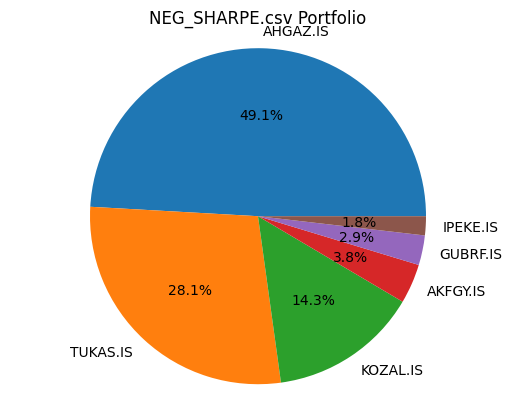

In [274]:

def PiePlot(DataFrame, name):
  import pandas as pd
  import matplotlib.pyplot as plt

  # Get the data
  df = DataFrame

  # Sort the data
  df = df.sort_values(by="End PF %", ascending=False)

  # Create the pie chart

  plt.pie(df["End PF %"], labels=df.index, autopct="%1.1f%%")
  plt.axis("equal")

  plt.title(f"{name} Portfolio")
  plt.show()


PiePlot(MYPF, YAHOO_PF_FILE)

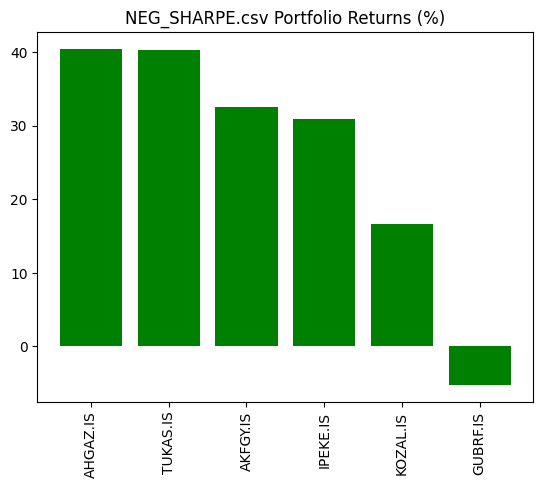

In [311]:
 def BarPlot(DataFrame, name):
  import pandas as pd
  import matplotlib.pyplot as plt
  # Get the data
  df = DataFrame
  # Sort the data
  df = df.sort_values(by="PnL %", ascending=False)

  # Create the bar chart or returns
  plt.bar(df.index, df["PnL %"], color="green", align="center")
  plt.xticks(rotation=90)

  plt.title(f"{name} Portfolio Returns (%)")
  plt.show()


BarPlot(MYPF, YAHOO_PF_FILE)

In [276]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [277]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()

    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable

    OrderedTable = OrderedTable.dropna() # drop NaN

    print("Ordered Table: \n --------------------------------------\n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    print(f"\n Initial prices: \n{portfolio.InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    print(f"\n Final prices: {portfolio.FinalPrices} \n")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    #portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares
    portfolio['Portfolio_Shares'] = MYPF.Quantity
    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)


    Prices = OrderedTable.iloc[:,1:].values
    print("Prices: \n --------------------------------------\n",Prices.T)

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    print("FirstPrices: \n --------------------------------------\n",FirstPrices)


    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    print("portfolio['Portfolio_Shares']: \n --------------------------------------\n",portfolio['Portfolio_Shares'])

    print(f"\n prices: \n ---------------------\n {Prices}")

    print(f"\n OrderedTable['PF_Value']: \n ---------------------\n {OrderedTable['PF_Value']}")


    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli

    return OrderedTable, portfolio

In [278]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        from IPython.display import Image
        Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [279]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
AHGAZ.IS,48279.0,9.62,464443.98,13.51,652249.29,46.90656,49.10581,40.436590,652249.0,48278.0
TUKAS.IS,42190.0,6.30,265797.00,8.84,372959.60,26.84419,28.07896,40.317460,372959.0,42189.0
KOZAL.IS,8588.0,18.99,163086.12,22.14,190138.32,16.47090,14.31492,16.587678,190138.0,8587.0
AKFGY.IS,21828.0,1.75,38199.00,2.32,50640.96,3.85791,3.81260,32.571429,50640.0,21827.0
GUBRF.IS,232.0,172.60,40043.20,163.60,37955.20,4.04417,2.85753,-5.214368,37955.0,231.0
IPEKE.IS,623.0,29.82,18577.86,39.02,24309.46,1.87627,1.83018,30.851777,24309.0,622.0


In [280]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
#OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2023-12-26 00:00:00+03:00  10.68  10.75   9.62   9.62  15247773        0.0   
2023-12-27 00:00:00+03:00   8.66   9.14   8.66   8.85  48659908        0.0   
2023-12-28 00:00:00+03:00   8.91   9.73   8.83   9.73  32468930        0.0   
2023-12-29 00:00:00+03:00   9.71  10.65   9.57  10.24  22037878        0.0   
2024-01-02 00:00:00+03:00  10.25  10.55  1

In [281]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100
print(f"Average return of the current portfolio is {np.mean(OrderedTimeSeries['pct_change'].dropna()) *100} %")

Average return of the current portfolio is 0.7219823530182763 %


Showing Tearsheet of NEG_SHARPE.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-12-27
End date,2024-02-09
Total months,1
,Backtest
Annual return,496.5%
Cumulative returns,25.5%
Annual volatility,23.7%
Sharpe ratio,7.67
Calmar ratio,157.52
Stability,0.95
Max drawdown,-3.2%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************

Error generating returns tear sheet: 'NoneType' object has no attribute 'savefig'


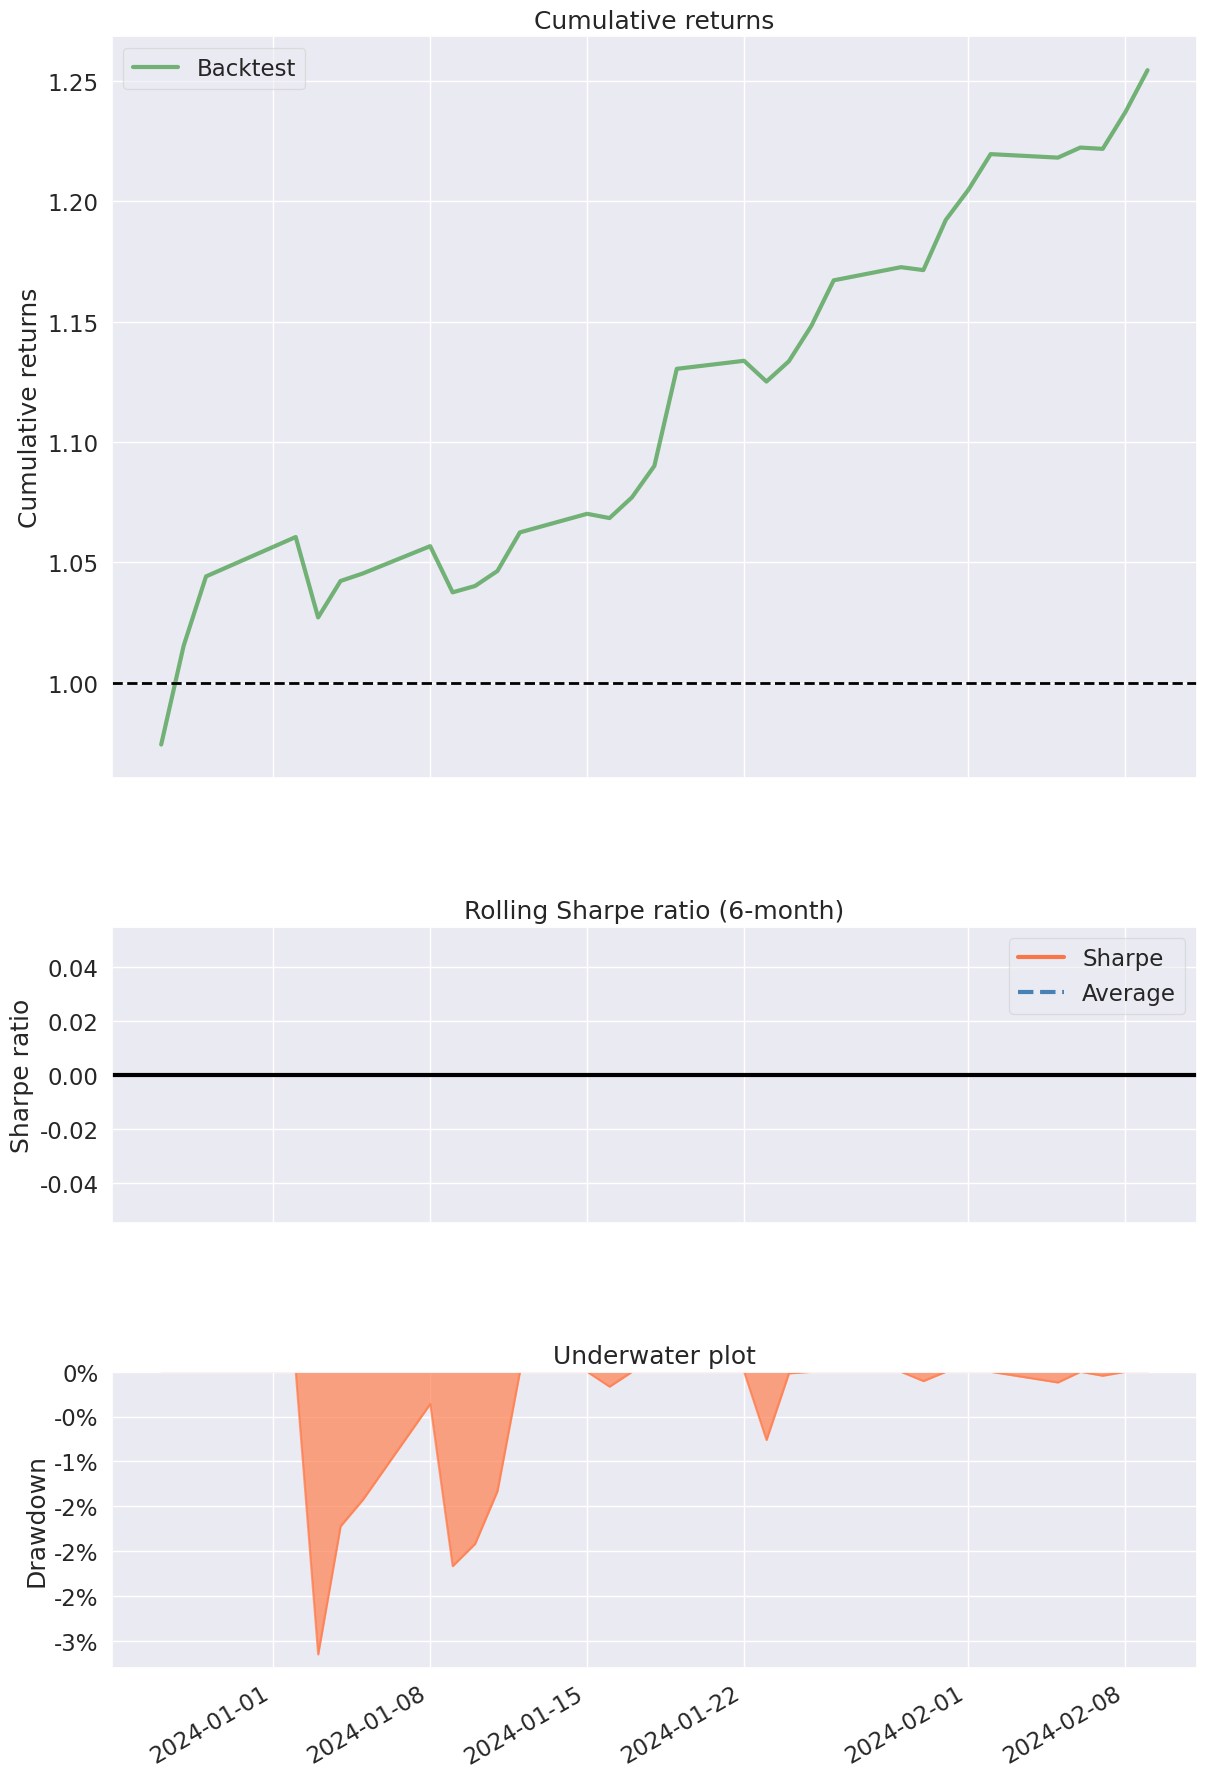

In [313]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [283]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-283-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-283-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-283-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyri

Annual return            4.964727
Cumulative returns       0.254549
Annual volatility        0.237354
Sharpe ratio             7.665337
Calmar ratio           157.515631
Stability                0.949693
Max drawdown            -0.031519
Omega ratio              3.646754
Sortino ratio           14.333515
Skew                    -0.325063
Kurtosis                 1.270442
Tail ratio               1.498946
Daily value at risk     -0.022684
dtype: float64

In [284]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
AHGAZ.IS,48279.0,9.62,464443.98,13.51,652249.29,46.91,49.11,40.44,652249.0,48278.0,0.491058,9.62,13.51,652249.311019,48279.0
TUKAS.IS,42190.0,6.30,265797.0,8.84,372959.60,26.84,28.08,40.32,372959.0,42189.0,0.280790,6.3,8.84,372959.580835,42190.0
KOZAL.IS,8588.0,18.99,163086.12,22.14,190138.32,16.47,14.31,16.59,190138.0,8587.0,0.143149,18.99,22.14,190138.330012,8588.0
AKFGY.IS,21828.0,1.75,38199.0,2.32,50640.96,3.86,3.81,32.57,50640.0,21827.0,0.038126,1.75,2.32,50640.967397,21828.0
GUBRF.IS,232.0,172.60,40043.2,163.60,37955.20,4.04,2.86,-5.21,37955.0,231.0,0.028575,172.6,163.6,37955.223093,232.0
IPEKE.IS,623.0,29.82,18577.86,39.02,24309.46,1.88,1.83,30.85,24309.0,622.0,0.018302,29.82,39.02,24309.417644,623.0


In [285]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [286]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [287]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [288]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [289]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [290]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [291]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [292]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['AHGAZ.IS',
 'TUKAS.IS',
 'KOZAL.IS',
 'GUBRF.IS',
 'AKFGY.IS',
 'IPEKE.IS',
 'TRY=X']

In [293]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [294]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 7 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 7 TICKERS from BIST30
****************************************************************


In [295]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [296]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [297]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [298]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [299]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [300]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [301]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [302]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.02953443, 0.23882175, 0.19423858, 0.21295719, 0.03065245,
       0.15411036, 0.13968524])

In [303]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [304]:
Optimal_weights_for_Percent_Returns = FindWeights()

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.0295 0.2388 0.1942 0.213  0.0307 0.1541 0.1397]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [305]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
TUKAS.IS    317186.78
GUBRF.IS    282917.85
KOZAL.IS    257946.70
IPEKE.IS    204683.76
TRY=X       185556.92
AKFGY.IS     40777.36
AHGAZ.IS     39183.46
Name: Amount in 1328252.8299999998 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [306]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

making operation with  Best_PF_For_bist30.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
ASELS.IS    648984.33
AKBNK.IS    404851.46
TCELL.IS    212520.45
YKBNK.IS     36526.95
FROTO.IS     17931.41
Name: Amount in 1328252.8299999998 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [307]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,16,ASELS.IS,49.51,49510.0,44.18,1120.0,0.4951,41.44,44.18,49510.0,1194,49479.36,52750.92,6.61,49.72,48.86,48860.0,44.18,1120.0
1,6,AKBNK.IS,26.49,26490.0,38.04,696.0,0.2649,30.62,38.04,26490.0,865,26486.30,32904.60,24.23,26.62,30.48,30480.0,38.04,696.0
2,11,TCELL.IS,18.92,18920.0,53.00,356.0,0.1892,57.94,53.00,18920.0,326,18888.44,17278.00,-8.53,18.98,16.00,16000.0,53.00,356.0
3,2,YKBNK.IS,2.42,2420.0,20.06,120.0,0.0242,16.27,20.06,2420.0,148,2407.96,2968.88,23.29,2.42,2.75,2750.0,20.06,120.0
4,21,FROTO.IS,1.87,1870.0,728.00,2.0,0.0187,858.71,728.00,1870.0,2,1717.42,1456.00,-15.22,1.73,1.35,1350.0,728.00,2.0
5,4,BIMAS.IS,0.79,790.0,301.00,2.0,0.0079,267.35,301.00,790.0,2,534.70,602.00,12.59,0.54,0.56,560.0,301.00,2.0


In [308]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
ASELS.IS    48.86
AKBNK.IS    30.48
TCELL.IS    16.00
YKBNK.IS     2.75
FROTO.IS     1.35
Name: %, dtype: float64

In [309]:
np.round(Markowitz_Weights,2)

,%,Amount in 1328252.8299999998 TL
assets,,
ASELS.IS,48.86,648984.33
AKBNK.IS,30.48,404851.46
TCELL.IS,16.00,212520.45
YKBNK.IS,2.75,36526.95
FROTO.IS,1.35,17931.41


In [310]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'AHGAZ': -652249.31, 'TUKAS': -372959.58, 'KOZAL': -190138.33, 'GUBRF': -37955.22, 'AKFGY': -50640.97, 'IPEKE': -24309.42, 'ASELS': 648984.33, 'AKBNK': 404851.46, 'TCELL': 212520.45, 'YKBNK': 36526.95, 'FROTO': 17931.41}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
        Buy/Sell
AHGAZ -652249.31
TUKAS -372959.58
KOZAL -190138.33
GUBRF  -37955.22
AKFGY  -50640.97
IPEKE  -24309.42
ASELS  648984.33
AKBNK  404851.46
TCELL  212520.45
YKBNK   36526.95
FROTO   17931.41
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          16  ASELS.IS  49.51  49510.0      44.18         1120.0   
1           6  AKBNK.IS  26.49  26490.0      38.04          696.0   
2          11  TCELL.IS  18.92  18920.0      53.00          356.0   
3           2  YKBNK.IS   2.42   2420.0      20.06          120.0   
4          21  FROTO.IS   1.87   1870.0     728.00            2.0   
5           4  BIMAS.IS   